In [111]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from src.vae_mi import *
from src.vae import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
train_dataset = np.load("./datasets/FireEvac_train_set.npy")
test_dataset = np.load("./datasets/FireEvac_test_set.npy")

max_train_dataset = np.max(train_dataset, axis=0)
min_train_dataset = np.min(train_dataset, axis=0)
max_test_dataset = np.max(test_dataset, axis=0)
min_test_dataset = np.min(test_dataset, axis=0)



In [113]:
range_train_dataset = max_train_dataset - min_train_dataset
range_test_dataset = max_test_dataset - min_test_dataset
# range [0,1]
train_dataset = ((train_dataset - min_train_dataset)/ range_train_dataset).astype('float32')
test_dataset = ((test_dataset - min_test_dataset) / range_test_dataset).astype('float32')

# range [-1,1]
# train_dataset = ((2 / range_train_dataset) * (train_dataset - min_train_dataset) - 1).astype('float32')
# test_dataset = ((2 / range_test_dataset) * (test_dataset - min_test_dataset) - 1).astype('float32')


In [114]:
test_size = len(test_dataset)
train_size = len(train_dataset)

In [115]:
batch_size = 1024
train_loader = torch.utils.data.DataLoader(train_dataset,drop_last=False,
                                           batch_size=batch_size, shuffle=True)

print(len(train_loader))
test_loader = torch.utils.data.DataLoader(test_dataset,drop_last=False,
                                           batch_size=test_size, shuffle=True)

3


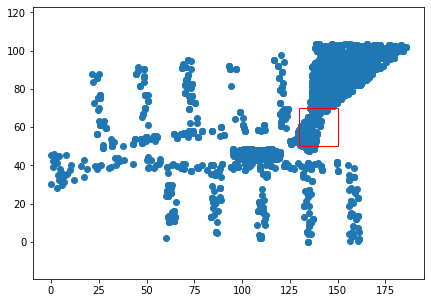

In [116]:
plot_fire_evac_dataset(train_dataset, range_train_dataset )

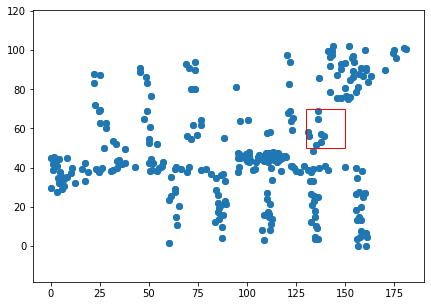

In [117]:
plot_fire_evac_dataset(test_dataset, range_test_dataset)

In [118]:
max_epochs = 801
show_step = 100
input_size = 2
output_size = 2
latent_dim = 2
en_hidden = [200,20]
de_hidden = [20,200]
gendata_size = 1000
vae = VAEmi(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3, weight_decay=1e-5)

###
scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', 
             patience=50, verbose=True, factor=0.5, min_lr =1e-7)
###

loss_train = []
loss_test = []
loss_epoch = 0
loss_test_epoch = 0

--------------------
Epoch 0
loss = 0.3727768063545227
original distribution


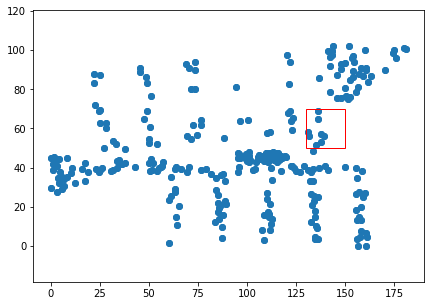

plot reconstruction distribution


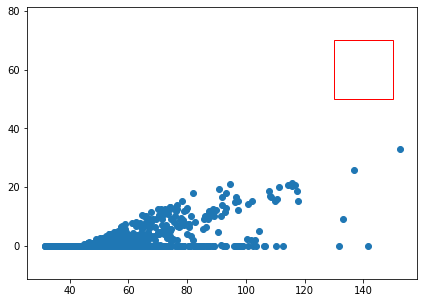

generate synthetic data


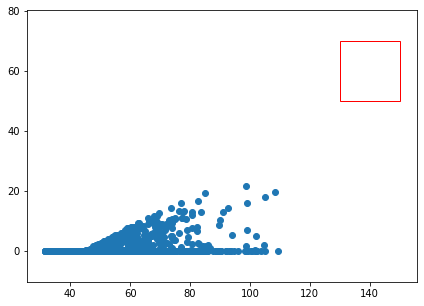

test loss = 0.18760493
--------------------
Epoch 1
loss = 0.3049047887325287
test loss = 0.16091807
--------------------
Epoch 2
loss = 0.23651786148548126
test loss = 0.14967296
--------------------
Epoch 3
loss = 0.1916911005973816
test loss = 0.14273733
--------------------
Epoch 4
loss = 0.1463160365819931
test loss = 0.12611571
--------------------
Epoch 5
loss = 0.11657091230154037
test loss = 0.10982819
--------------------
Epoch 6
loss = 0.09715045243501663
test loss = 0.102727406
--------------------
Epoch 7
loss = 0.09051086753606796
test loss = 0.11075013
--------------------
Epoch 8
loss = 0.08679458498954773
test loss = 0.1026069
--------------------
Epoch 9
loss = 0.08079135417938232
test loss = 0.10037851
--------------------
Epoch 10
loss = 0.07087080180644989
test loss = 0.09531929
--------------------
Epoch 11
loss = 0.06651990115642548
test loss = 0.09986386
--------------------
Epoch 12
loss = 0.06248771771788597
test loss = 0.09863639
--------------------
Epoch 13

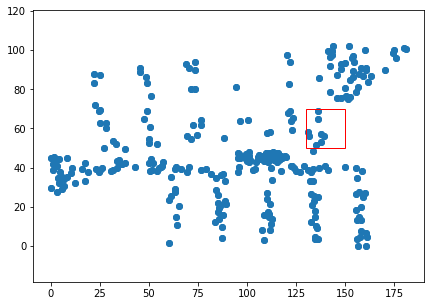

plot reconstruction distribution


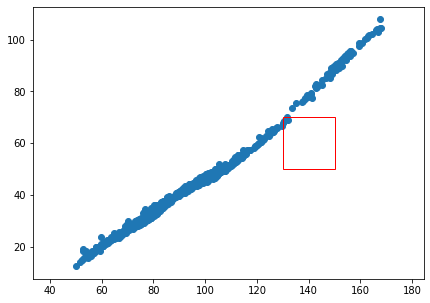

generate synthetic data


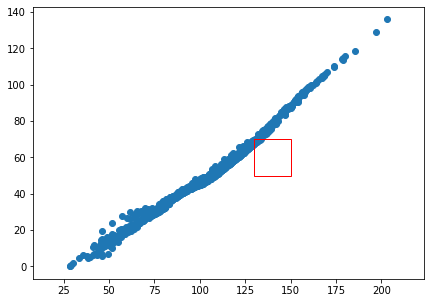

test loss = 0.033127643
--------------------
Epoch 101
loss = 0.012207121588289738
test loss = 0.033165887
--------------------
Epoch 102
loss = 0.012167414650321007
test loss = 0.032953028
--------------------
Epoch 103
loss = 0.012088273651897907
test loss = 0.032997727
--------------------
Epoch 104
loss = 0.012130706571042538
test loss = 0.032824073
--------------------
Epoch 105
loss = 0.011997098103165627
test loss = 0.032255158
--------------------
Epoch 106
loss = 0.012075811624526978
test loss = 0.0324834
--------------------
Epoch 107
loss = 0.011999189853668213
test loss = 0.03217608
--------------------
Epoch 108
loss = 0.012060008011758327
test loss = 0.03227684
--------------------
Epoch 109
loss = 0.011978188529610634
test loss = 0.032097198
--------------------
Epoch 110
loss = 0.011940086260437965
test loss = 0.03172882
--------------------
Epoch 111
loss = 0.011880634352564812
test loss = 0.031789884
--------------------
Epoch 112
loss = 0.0118380943313241
test loss =

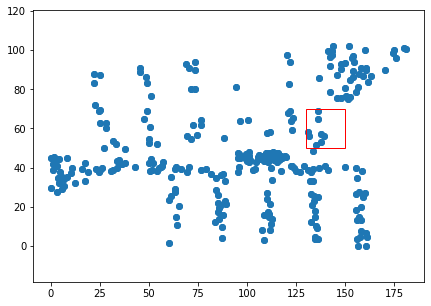

plot reconstruction distribution


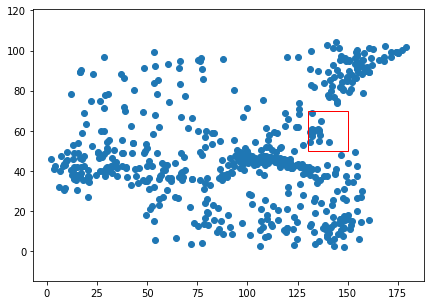

generate synthetic data


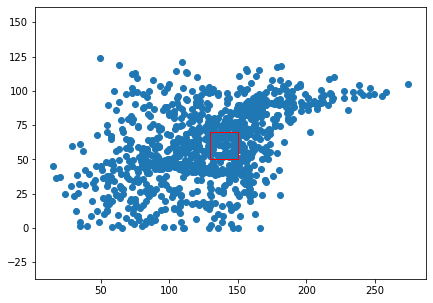

test loss = 0.0087403925
--------------------
Epoch 201
loss = 0.004885571077466011
test loss = 0.008660531
--------------------
Epoch 202
loss = 0.004958602134138346
test loss = 0.00856466
--------------------
Epoch 203
loss = 0.0048934477381408215
test loss = 0.008742505
--------------------
Epoch 204
loss = 0.004823391791433096
test loss = 0.008587019
--------------------
Epoch 205
loss = 0.0048330994322896
test loss = 0.008776387
--------------------
Epoch 206
loss = 0.00487358495593071
test loss = 0.008786809
--------------------
Epoch 207
loss = 0.004836642183363438
test loss = 0.008614559
--------------------
Epoch 208
loss = 0.004807656165212393
test loss = 0.008665999
--------------------
Epoch 209
loss = 0.004807296674698591
test loss = 0.008521764
--------------------
Epoch 210
loss = 0.004797366447746754
test loss = 0.008665404
--------------------
Epoch 211
loss = 0.00482296384871006
test loss = 0.008571929
--------------------
Epoch 212
loss = 0.0047614420764148235
test l

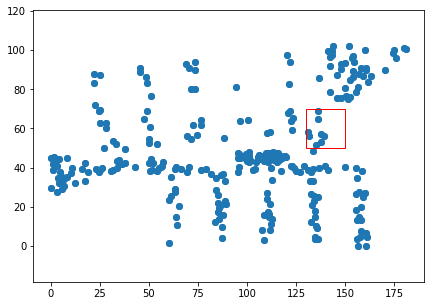

plot reconstruction distribution


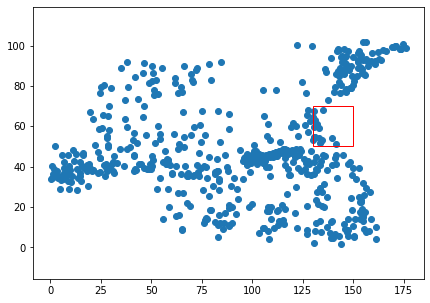

generate synthetic data


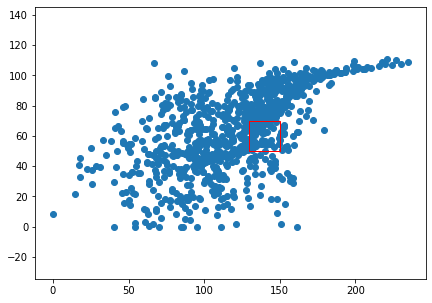

test loss = 0.008393303
--------------------
Epoch 301
loss = 0.004392759874463081
test loss = 0.008489371
--------------------
Epoch 302
loss = 0.0044264039024710655
test loss = 0.008370928
--------------------
Epoch 303
loss = 0.004355211276561022
test loss = 0.008385672
--------------------
Epoch 304
loss = 0.004416986368596554
test loss = 0.008407082
--------------------
Epoch 305
loss = 0.0044104307889938354
test loss = 0.008343105
--------------------
Epoch 306
loss = 0.004390240181237459
test loss = 0.008495072
--------------------
Epoch 307
loss = 0.004390813875943422
test loss = 0.008449866
--------------------
Epoch 308
loss = 0.00441693514585495
test loss = 0.008387247
--------------------
Epoch 309
loss = 0.004387263208627701
test loss = 0.008565918
--------------------
Epoch 310
loss = 0.004344018641859293
test loss = 0.008508067
--------------------
Epoch 311
loss = 0.004408532287925482
test loss = 0.0084120035
--------------------
Epoch 312
loss = 0.0044110799208283424
t

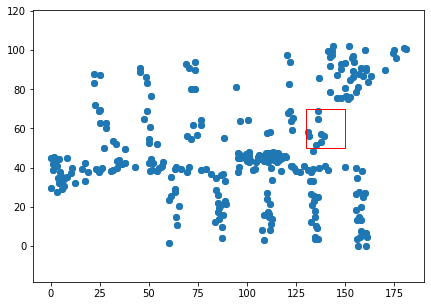

plot reconstruction distribution


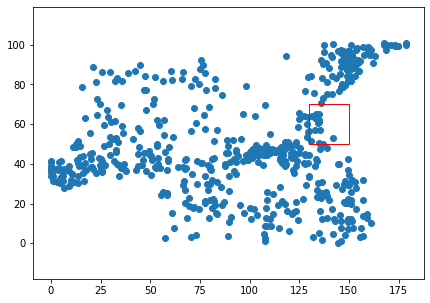

generate synthetic data


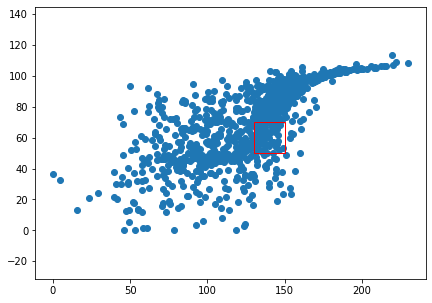

test loss = 0.00855383
--------------------
Epoch 401
loss = 0.004293125122785568
test loss = 0.008405346
--------------------
Epoch 402
loss = 0.004316813312470913
test loss = 0.008385386
--------------------
Epoch 403
loss = 0.00431742612272501
test loss = 0.008583825
--------------------
Epoch 404
loss = 0.004295129328966141
test loss = 0.008436048
--------------------
Epoch 405
loss = 0.00431083794683218
test loss = 0.008450562
--------------------
Epoch 406
loss = 0.004305359907448292
test loss = 0.008489822
--------------------
Epoch 407
loss = 0.004306918941438198
test loss = 0.008559918
--------------------
Epoch 408
loss = 0.004288604017347097
test loss = 0.0083221765
--------------------
Epoch 409
loss = 0.004261546302586794
test loss = 0.008463074
--------------------
Epoch 410
loss = 0.004265472758561373
test loss = 0.008499924
--------------------
Epoch 411
loss = 0.004271984100341797
test loss = 0.008509424
--------------------
Epoch 412
loss = 0.004268997348845005
test l

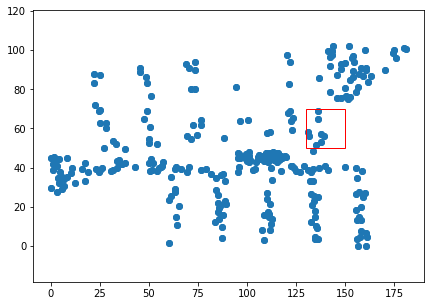

plot reconstruction distribution


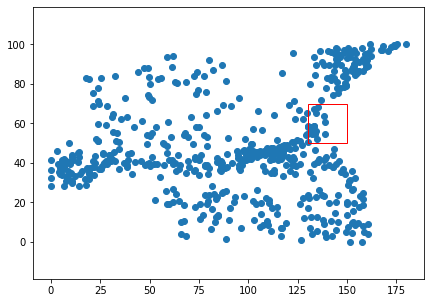

generate synthetic data


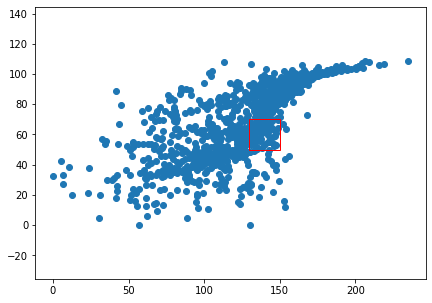

test loss = 0.008436145
--------------------
Epoch 501
loss = 0.0042314487509429455
test loss = 0.00849455
--------------------
Epoch 502
loss = 0.0042723193764686584
test loss = 0.008637342
--------------------
Epoch 503
loss = 0.004228836856782436
test loss = 0.008524586
--------------------
Epoch 504
loss = 0.004257053602486849
test loss = 0.00856405
--------------------
Epoch 505
loss = 0.004237759858369827
test loss = 0.008463499
--------------------
Epoch 506
loss = 0.00425540329888463
test loss = 0.008396825
--------------------
Epoch 507
loss = 0.004256619140505791
test loss = 0.008723786
--------------------
Epoch 508
loss = 0.004247537348419428
test loss = 0.008518654
--------------------
Epoch 509
loss = 0.004254222847521305
test loss = 0.008640569
--------------------
Epoch 510
loss = 0.0042730034328997135
test loss = 0.008471495
--------------------
Epoch 511
loss = 0.004232838749885559
test loss = 0.008668537
--------------------
Epoch 512
loss = 0.00425615394487977
test 

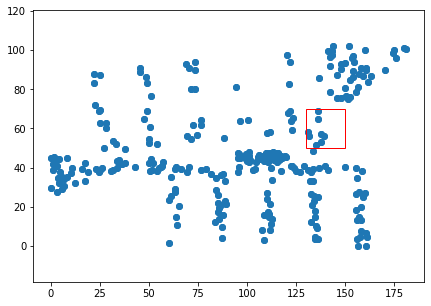

plot reconstruction distribution


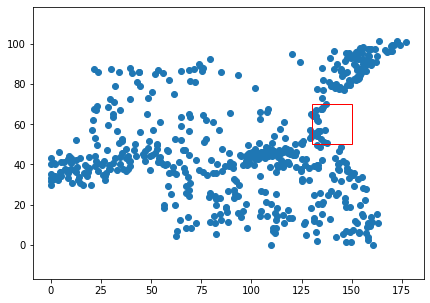

generate synthetic data


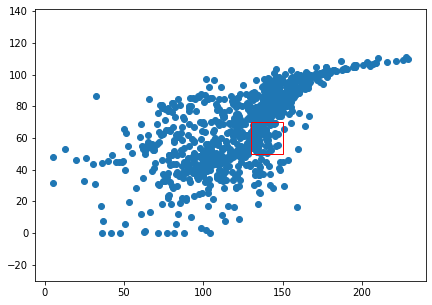

test loss = 0.008435984
--------------------
Epoch 601
loss = 0.004243134055286646
test loss = 0.008513155
--------------------
Epoch 602
loss = 0.0042179543524980545
Epoch   603: reducing learning rate of group 0 to 2.5000e-04.
test loss = 0.008459886
--------------------
Epoch 603
loss = 0.004187875892966986
test loss = 0.00852146
--------------------
Epoch 604
loss = 0.004177251365035772
test loss = 0.00862338
--------------------
Epoch 605
loss = 0.004197015892714262
test loss = 0.008494372
--------------------
Epoch 606
loss = 0.004184524994343519
test loss = 0.00847373
--------------------
Epoch 607
loss = 0.004158995114266872
test loss = 0.008482699
--------------------
Epoch 608
loss = 0.004165035672485828
test loss = 0.008588734
--------------------
Epoch 609
loss = 0.00424164766445756
test loss = 0.008584658
--------------------
Epoch 610
loss = 0.004210563842207193
test loss = 0.008332305
--------------------
Epoch 611
loss = 0.004197235684841871
test loss = 0.008531976
----

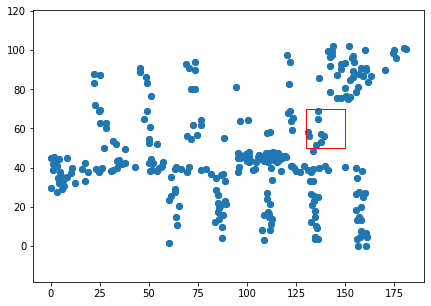

plot reconstruction distribution


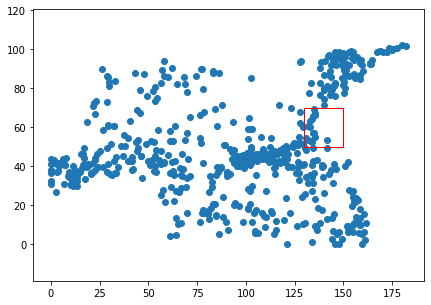

generate synthetic data


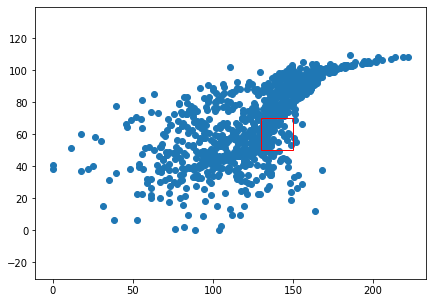

test loss = 0.008390803
--------------------
Epoch 701
loss = 0.004213129170238972
test loss = 0.008530703
--------------------
Epoch 702
loss = 0.004182369448244572
test loss = 0.008561648
--------------------
Epoch 703
loss = 0.004204281605780125
test loss = 0.008444741
--------------------
Epoch 704
loss = 0.0042009116150438786
test loss = 0.008442725
--------------------
Epoch 705
loss = 0.004245947115123272
test loss = 0.008384568
--------------------
Epoch 706
loss = 0.0042318240739405155
test loss = 0.008626491
--------------------
Epoch 707
loss = 0.004188615828752518
test loss = 0.008607358
--------------------
Epoch 708
loss = 0.0041979532688856125
Epoch   709: reducing learning rate of group 0 to 1.2500e-04.
test loss = 0.008488029
--------------------
Epoch 709
loss = 0.004239958245307207
test loss = 0.0085109975
--------------------
Epoch 710
loss = 0.0041898926720023155
test loss = 0.008526362
--------------------
Epoch 711
loss = 0.0042128353379666805
test loss = 0.00849

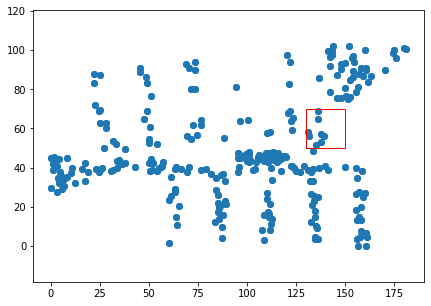

plot reconstruction distribution


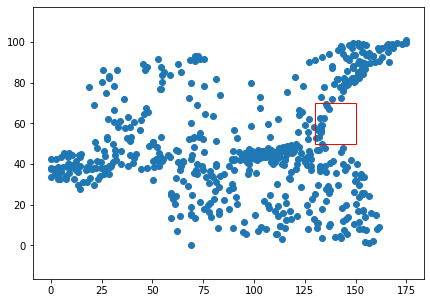

generate synthetic data


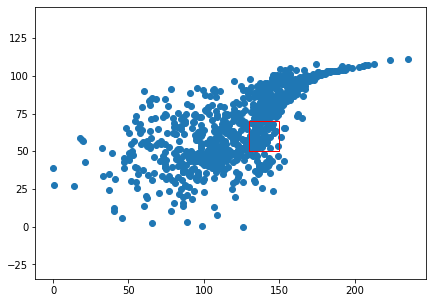

test loss = 0.008500572


In [119]:
for epoch in range(max_epochs):
    print("-"*20)
    print("Epoch {0}".format(epoch))
    for batch in train_loader:
        x = batch
        opt.zero_grad()
        reconstruction, mu, sigma = vae.forward_elbo(x)
        loss = -vae.loss_function(x, reconstruction, mu, sigma).mean(-1)
        loss_epoch += loss
        loss /= len(batch)
        loss.backward()
        opt.step()
        
    loss_epoch = loss_epoch / train_size
    print("loss = {0}".format(loss_epoch.item()))
    loss_train.append(loss_epoch)
    
    #####
    scheduler.step(loss_epoch)
    #####
    loss_epoch = 0
    
    loss_test_epoch = 0
    for batch_test in test_loader:
         x_test = batch_test
         with torch.no_grad():
            reconstruction_test, mu_test, sigma_test = vae.forward_elbo(x_test)
            loss = -vae.loss_function(x_test, reconstruction_test, mu_test, sigma_test).mean(-1)
            loss_test_epoch += loss
            
         if epoch % 100 == 0:
            print("original distribution")
            plot_fire_evac_dataset(x_test, range_test_dataset)
            print("plot reconstruction distribution")
            plot_fire_evac_dataset(reconstruction_test, range_test_dataset)
            print("generate synthetic data")
            gen_data = vae.gen_sample_data(gendata_size, latent_dim)
            plot_fire_evac_tensor_dataset(gen_data, range_test_dataset)
    
    loss_test_epoch = (loss_test_epoch / test_size).numpy()
    print("test loss = " + str(loss_test_epoch))
    loss_test.append(loss_test_epoch)
    

Text(0.5, 1.0, 'epoch vs training elbo')

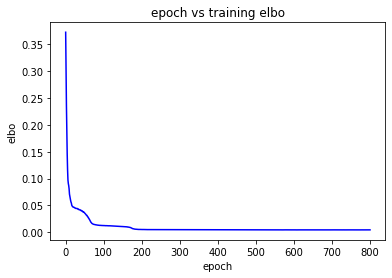

In [120]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs training elbo")

Text(0.5, 1.0, 'epoch vs testing elbo')

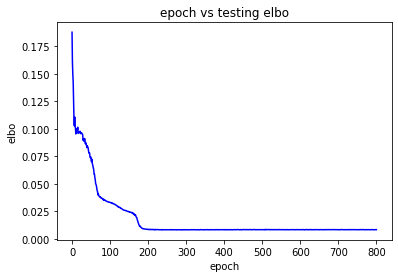

In [121]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs testing elbo")

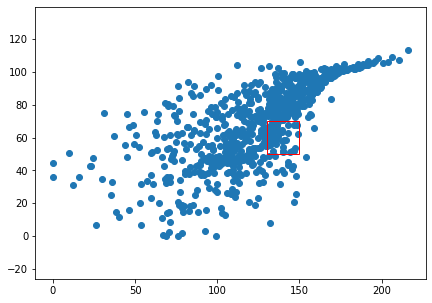

74 persons are at the given area


In [122]:
gendata_size_critial = 800
gen_data = vae.gen_sample_data(gendata_size_critial, latent_dim)
gen_data = gen_data.detach().numpy()
plot_fire_evac_dataset(gen_data, range_test_dataset)
nr_person = cal_nr_persons(gen_data, range_test_dataset)
print("{0} persons are at the given area".format(nr_person))

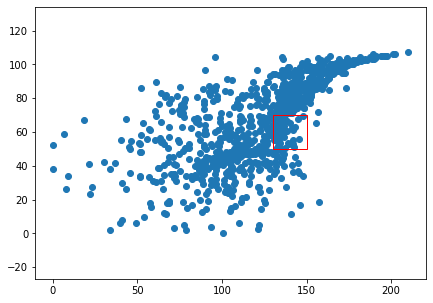

100 persons are at the given area


In [126]:
gendata_size_critial = 970
gen_data = vae.gen_sample_data(gendata_size_critial, latent_dim)
gen_data = gen_data.detach().numpy()
plot_fire_evac_dataset(gen_data, range_test_dataset)
nr_person = cal_nr_persons(gen_data, range_test_dataset)
print("{0} persons are at the given area".format(nr_person))